In [2]:
import os
import sys
import plotdata.cli.viewPS as viewPS
import plotdata.cli.plot_data as plot_data
os.chdir(os.getenv('SCRATCHDIR'))
!pwd

/Users/giacomo/Library/CloudStorage/OneDrive-UniversityofMiami/scratch


# Mintpy

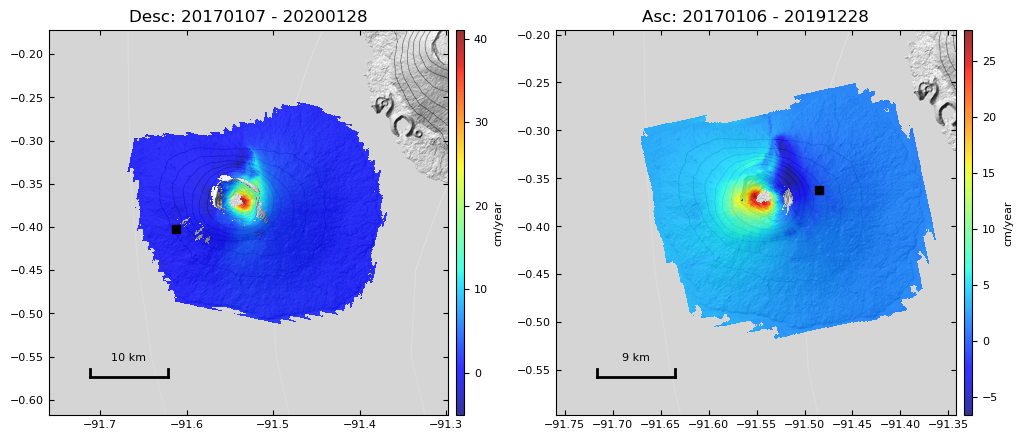

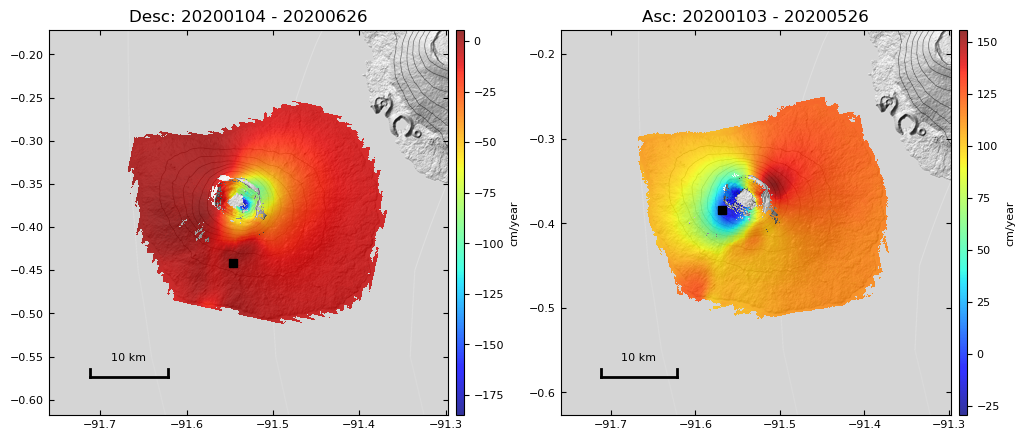

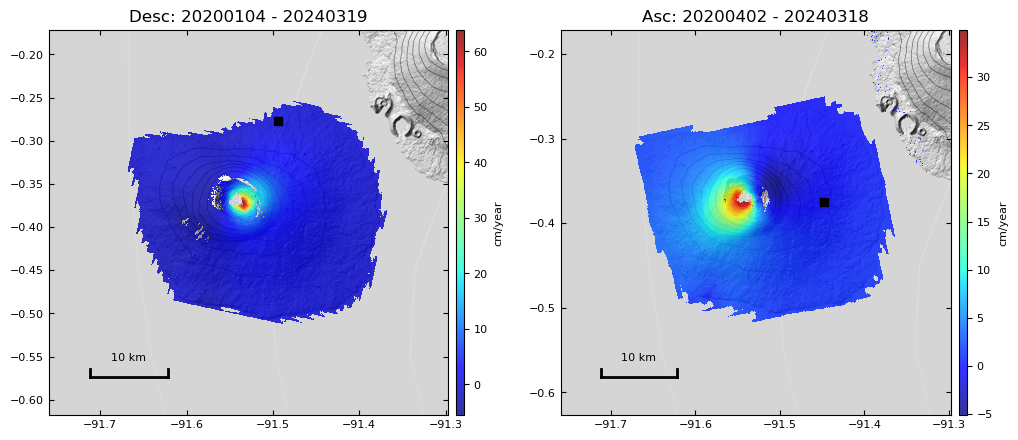

In [4]:
%%capture --no-display
EXAMPLE='''
plot_data.py FernandinaSenDT128/2017_2020_mintpy FernandinaSenAT106/2017_2020_mintpy --plot-type velocity --dem FernandinaSenAT106/Fernandina_dem.tif
plot_data.py FernandinaSenDT128/202001_202006_mintpy FernandinaSenAT106/202001_202006_mintpy --plot-type velocity --dem FernandinaSenAT106/Fernandina_dem.tif
plot_data.py FernandinaSenDT128/202004_202403_mintpy FernandinaSenAT106/202004_202403_mintpy --plot-type velocity --dem FernandinaSenAT106/Fernandina_dem.tif
'''
lines = EXAMPLE.splitlines()
os.chdir(os.getenv('SCRATCHDIR'))
for line in lines[1:]:
    line = line.strip()
    cmd=line.strip().split(' ')
    sys.argv = cmd
    plot_data.main(sys.argv) 

## Eruption

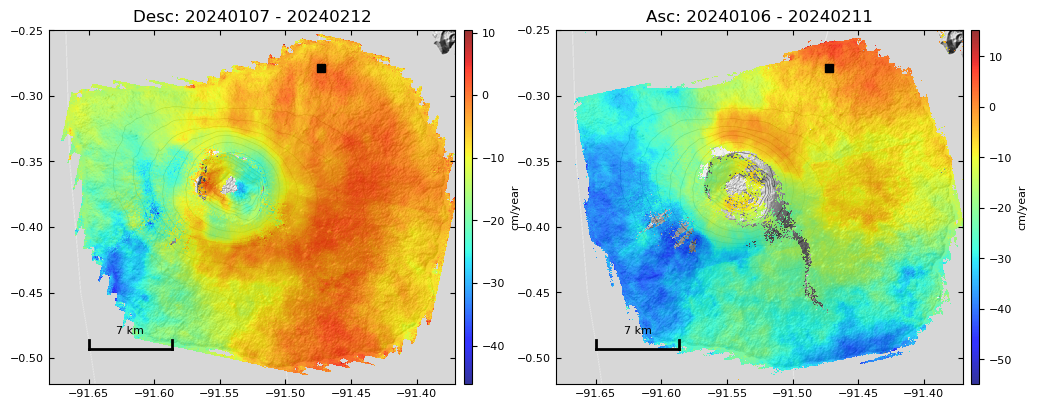

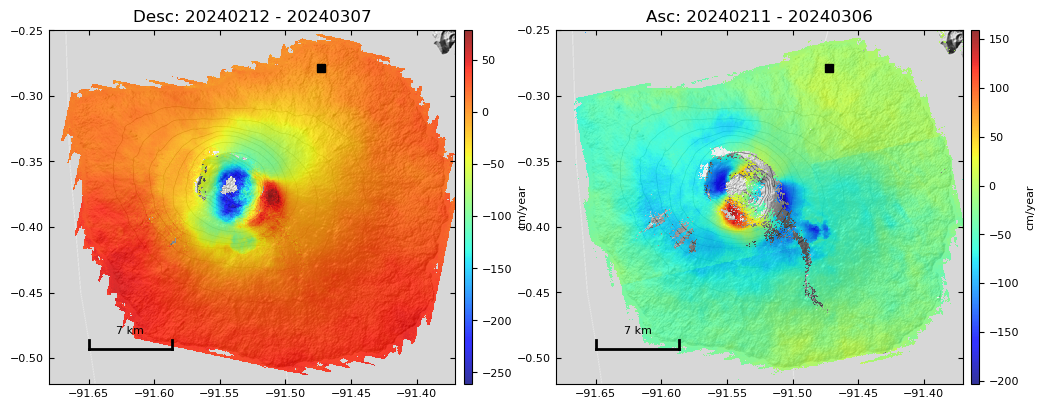

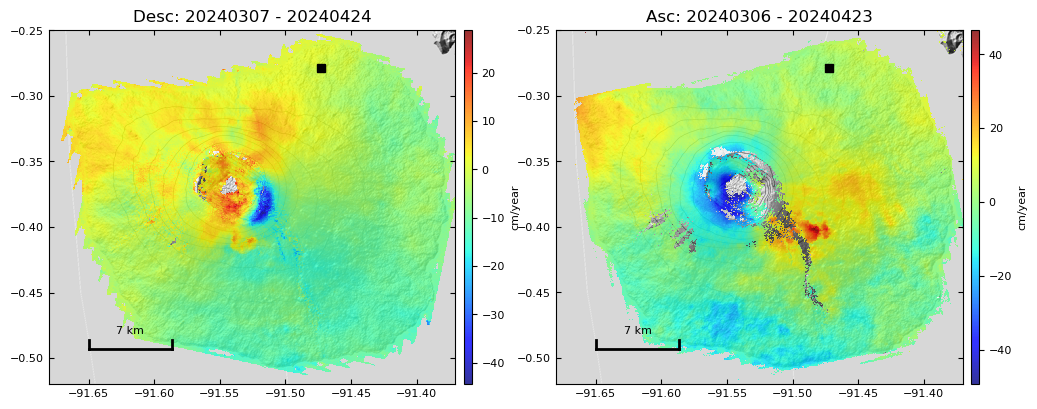

In [58]:
%%capture --no-display
EXAMPLE='''
plot_data.py FernandinaSenDT128/2024_mintpy FernandinaSenAT106/2024_mintpy --plot-type velocity --dem FernandinaSenAT106/Fernandina_dem.tif --mask-thresh 0.55 --shade-exag 1 --period=20240107-20240219 --ref-lalo=-0.27915,-91.47249 --subset-lalo=-0.52:-0.25,-91.68:-91.37
plot_data.py FernandinaSenDT128/2024_mintpy FernandinaSenAT106/2024_mintpy --plot-type velocity --dem FernandinaSenAT106/Fernandina_dem.tif --mask-thresh 0.55 --shade-exag 1 --period=20240219-20240310 --ref-lalo=-0.27915,-91.47249 --subset-lalo=-0.52:-0.25,-91.68:-91.37
plot_data.py FernandinaSenDT128/2024_mintpy FernandinaSenAT106/2024_mintpy --plot-type velocity --dem FernandinaSenAT106/Fernandina_dem.tif --mask-thresh 0.55 --shade-exag 1 --period=20240310-20240501 --ref-lalo=-0.27915,-91.47249 --subset-lalo=-0.52:-0.25,-91.68:-91.37
'''
lines = EXAMPLE.splitlines()
os.chdir(os.getenv('SCRATCHDIR'))
for line in lines[1:]:
    line = line.strip()
    cmd=line.strip().split(' ')
    sys.argv = cmd
    plot_data.main(sys.argv) 

## Interferogram

In [5]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from mintpy.utils import readfile, utils as ut, plot as pp
from mintpy.cli import view, tsview, plot_network, plot_transection
from mintpy.view import prep_slice, plot_slice
import utils
import subprocess
plt.rcParams.update({'font.size': 12})

# utils function
def write_config_file(out_file, CONFIG_TXT, mode='a'): 
    """Write configuration files for MintPy to process ARIA sample products"""
    if not os.path.isfile(out_file) or mode == 'w':
        with open(out_file, "w") as fid:
            fid.write(CONFIG_TXT)
        print('write configuration to file: {}'.format(out_file))
    else:
        with open(out_file, "a") as fid:
            fid.write("\n" + CONFIG_TXT)
        print('add the following to file: \n{}'.format(CONFIG_TXT))

# define and go to the work directory
work_dir = os.path.expanduser('~/onedrive/scratch/AgungSenDT32')
os.makedirs(work_dir, exist_ok=True)
os.chdir(work_dir)
print('Go to work directory:', work_dir)


Go to work directory: /Users/giacomo/onedrive/scratch/AgungSenDT32


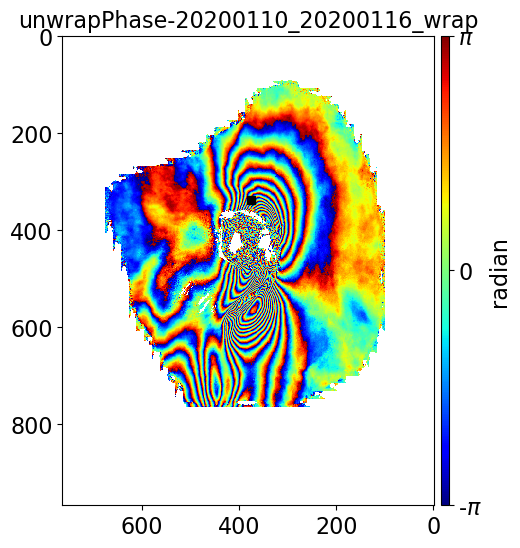

In [9]:
%%capture --no-display
scratch = os.getenv('SCRATCHDIR')
vlc = 'FernandinaSenDT128/2016_2024_mintpy'
cmd = f'{scratch}/{vlc}/ifgramStack.h5 unwrapPhase-20200110_20200116* --wrap --mask {scratch}/{vlc}/maskTempCoh.h5'
view.main(cmd.split())

# Precipitation

In [1]:
import sys
from precip.cli import get_precipitation_lalo

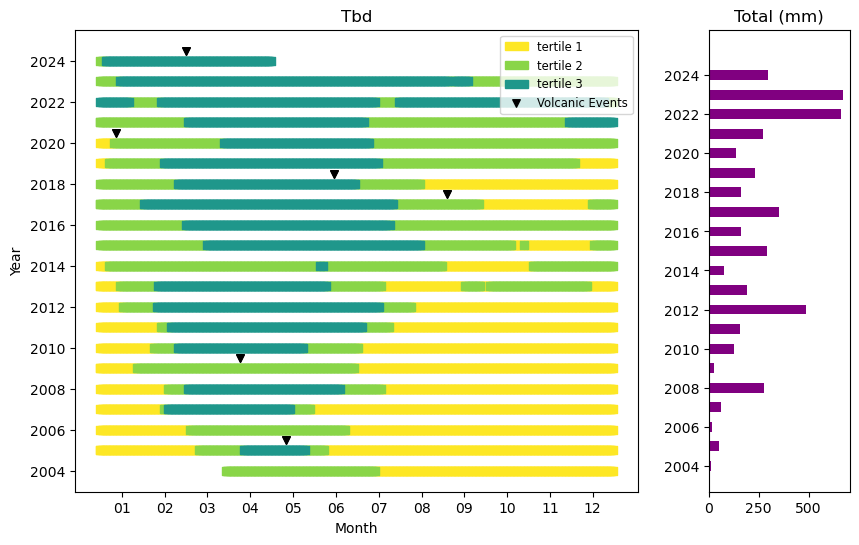

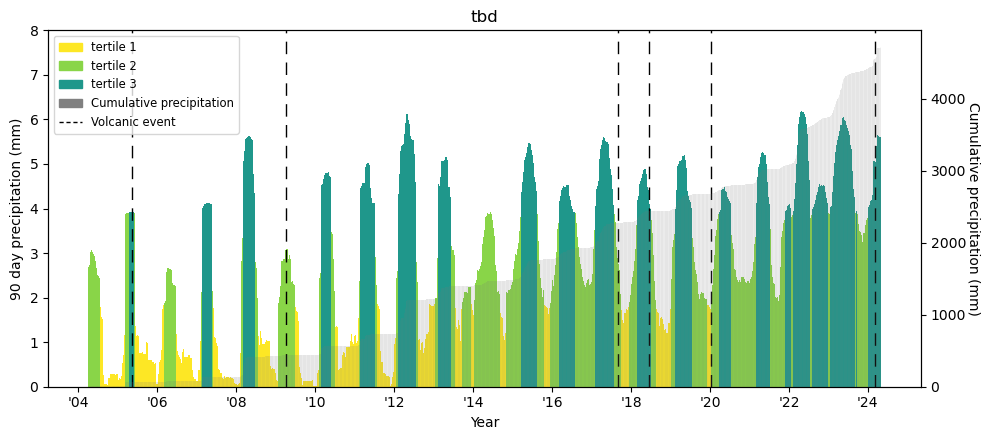

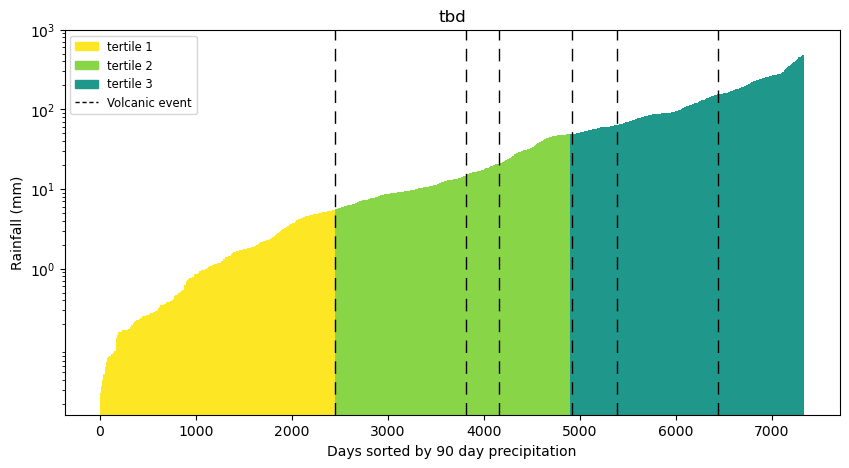

In [2]:
%%capture --no-display
volcano = 'Fernandina'
period = '20040101:20240501'
lines = f'''
get_precipitation_lalo.py --annual-plotter {volcano} 3 90 --period={period}
get_precipitation_lalo.py --bar-plotter {volcano} 3 90 --period={period}
get_precipitation_lalo.py --strength {volcano} 3 90 --period={period}
'''
lines = lines.splitlines()
for line in lines[1:]:
    line = line.strip()
    cmd=line.strip().split(' ')
    sys.argv = cmd
    get_precipitation_lalo.main()